In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats



from pandas.plotting import scatter_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import precision_recall_curve, roc_curve, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, auc

from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import sys
sys.path.insert(0, '../src')
sys.path.insert(0, '../data')

import functions


%load_ext autoreload
%autoreload 2

sns.set()



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [135]:
columns = ['DEP', 'PT', 'AGE', 'GT', 'EL', 'SC', 'CO', 'FA', 'ST']

## Data Import & Cleaning

Psychological Operations Assessment and Selection (POAS)

In [136]:
poas_filepath = '../data/poas'
poas_filenames = ['poas16.xlsx', 'poas17.xlsx', 'poas18.xlsx', 'poas19.xlsx', 'poas20.xlsx', 'poas21.xlsx', 'poas22.xlsx']


poas = functions.clean_data(poas_filepath, poas_filenames, columns)
poas.to_excel('../data/poas/poas.xlsx', index=False)
poas.sample(5)

/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():


,RANK,RACE,MOS,SEC,AB,RGR,PT,ED,MARITAL,DEP,...,LANG,GT,EL,SC,CO,FA,ST,WVR,RESULT,CODE
55,SSG,H,29E,T,T,F,242,3YR,M,1,...,1,110,108,109,107,106,109,T,NO SHOW 11 NOV 15,NS
2295,SGT,W,11B,T,F,F,247,HSD,M,1,...,0,113,107,108,107,108,109,F,SELECT,SEL
2536,CPL,W,25B,T,F,F,269,HSD,M,0,...,1,116,114,115,114,114,115,F,PFA FAILURE,PFA
1501,SPC,A,11B,T,T,F,267,HSD,S,0,...,0,121,116,118,116,118,119,T,SELECT,SEL
1397,PFC,B,31B,T,F,F,267,HSD,S,0,...,0,111,102,104,101,102,104,T,ADMINISTRATIVE,BRD


Special Forces Assesment and Selection (SFAS)

In [137]:
sfas_filepath = '../data/sfas'
sfas_filenames = ['sfas16.xlsx', 'sfas17.xlsx', 'sfas18.xlsx', 'sfas19.xlsx', 'sfas20.xlsx', 'sfas21.xlsx', 'sfas22.xlsx']

sfas = functions.clean_data(sfas_filepath, sfas_filenames, columns)
poas.to_excel('../data/sfas/sfas.xlsx', index=False)
sfas.sample(5)

/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Conditional Formatting extension is not supported and will be removed
  for idx, row in parser.parse():


,RANK,RACE,MOS,SEC,AB,RGR,PT,ED,MARITAL,DEP,...,LANG,GT,EL,SC,CO,FA,ST,WVR,RESULT,CODE
5729,SSG,A,91A,F,F,F,267,HSD,S,0,...,1,119,116,117,114,114,116,F,VOLUNTARY WITHDRAW,VW
8291,PFC,W,11C,T,F,F,242,1 YR,S,0,...,0,134,131,132,130,131,132,F,PFA FAILURE,PFA
5866,SPC,B,91F,T,F,F,249,HSD,M,0,...,0,112,107,107,108,110,110,T,INVOLUNTARY WITHDRAW,IVW
6646,SPC,B,92F,T,F,F,284,HSD,S,0,...,0,110,108,109,109,109,109,F,+COVID-19,CV19
5591,SPC,W,13B,T,F,F,278,4YR,S,0,...,0,123,146,144,151,149,142,F,SELECTED,SEL


## Initial Overview

View of overall data

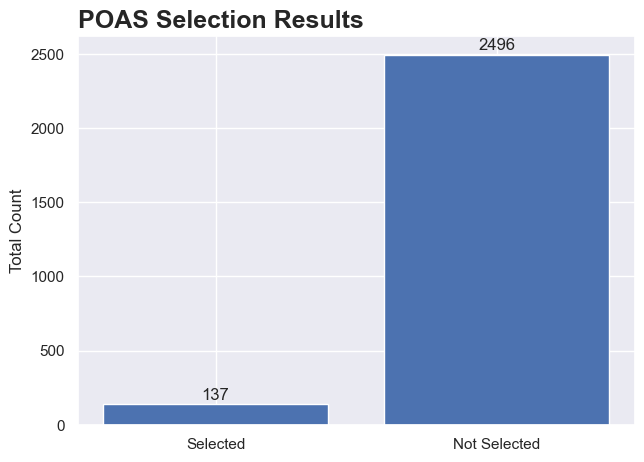

In [138]:
poas_selected = functions.equal_column_val(poas, 'RESULT', 'SELECTED')
poas_not_selected = functions.not_column_val(poas, 'RESULT', 'SELECTED')

outcome = [poas_selected.RESULT.count(), poas_not_selected.RESULT.count()]


functions.select_bar_plot(outcome, ['Selected', 'Not Selected'] , 'POAS Selection Results', 'Total Count')


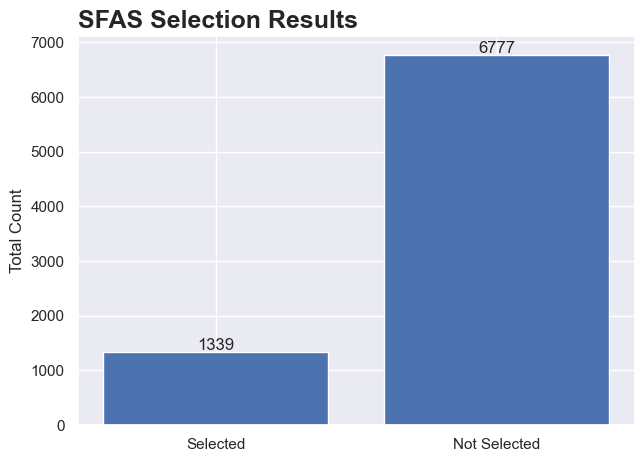

In [139]:
sfas_selected = functions.equal_column_val(sfas, 'RESULT', 'SELECTED')
sfas_not_selected = functions.not_column_val(sfas, 'RESULT', 'SELECTED')

outcome = [sfas_selected.RESULT.count(), sfas_not_selected.RESULT.count()]


functions.select_bar_plot(outcome, ['Selected', 'Not Selected'] , 'SFAS Selection Results', 'Total Count')

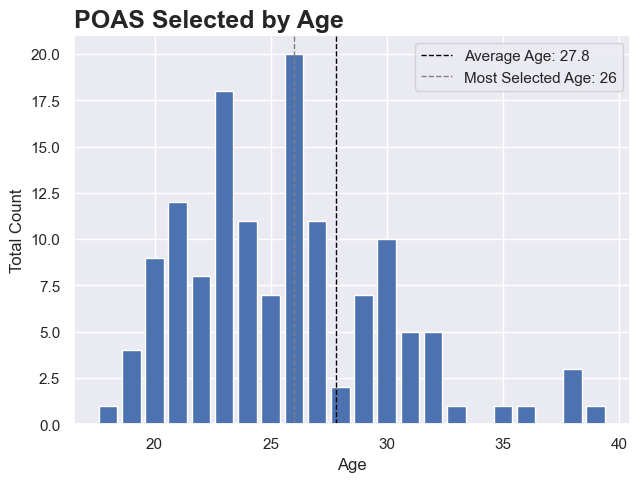

In [148]:
poas_ages = poas_selected.groupby('AGE').size().reset_index(name='counts')
poas_avg_age = poas_ages.mean()
poas_most_age = poas_ages.loc[poas_ages['counts'].idxmax(), 'AGE']


functions.age_bar_plot(poas_ages['AGE'], poas_ages['counts'], 'POAS Selected by Age', 'Age', 'Total Count', poas_avg_age[0], poas_most_age)


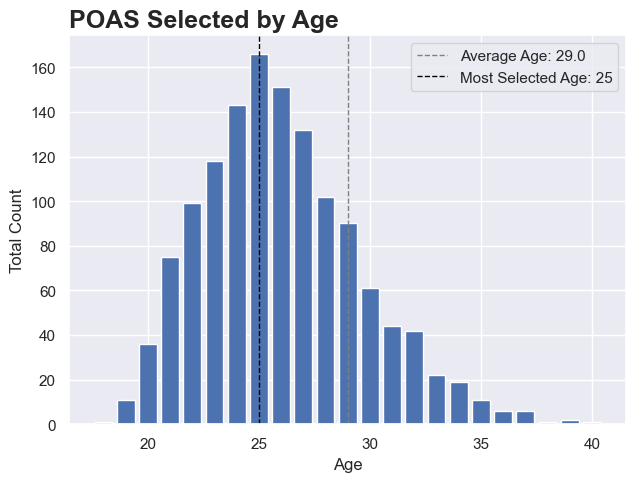

In [147]:
sfas_ages = sfas_selected.groupby('AGE').size().reset_index(name='counts')
sfas_avg_age = sfas_ages.mean()
sfas_most_age = sfas_ages.loc[sfas_ages['counts'].idxmax(), 'AGE']


functions.age_bar_plot(sfas_ages['AGE'], sfas_ages['counts'], 'POAS Selected by Age', 'Age', 'Total Count', sfas_avg_age[0], sfas_most_age)